# Titanic Passenger Survival Analysis

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Importing the Dataset

In [2]:
dataset = pd.read_csv('titanic.csv')
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
print("# of passengers in dataset are:", len(dataset))

# of passengers in dataset are: 891


## Data Visualization
Analyze the Data
Plot to check how many passenger survived

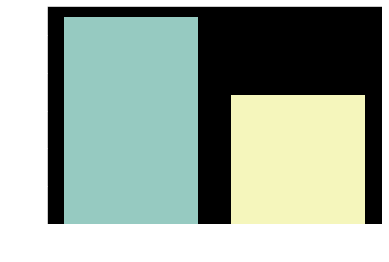

In [4]:
sns.countplot(dataset['Survived'])

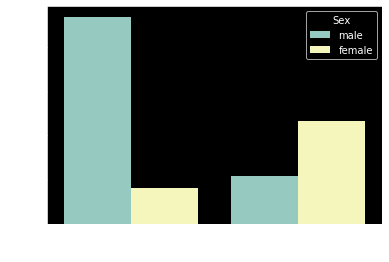

In [5]:
sns.countplot(x='Survived', hue='Sex', data=dataset)

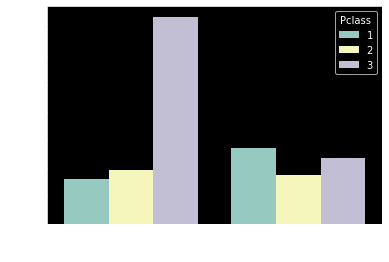

In [6]:
# Passenger class
sns.countplot(dataset['Survived'], hue=dataset['Pclass'])

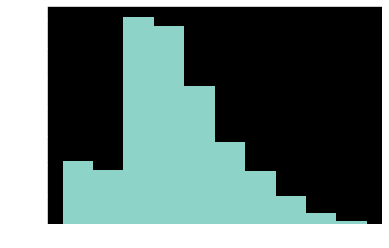

In [7]:
# Age distribution
dataset['Age'].plot.hist()

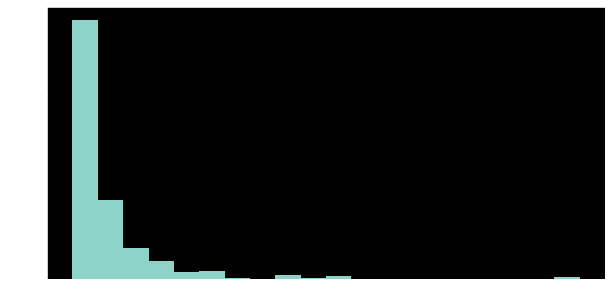

In [8]:
# Plotting Fare
dataset['Fare'].plot.hist(bins=20, figsize=(10, 5))

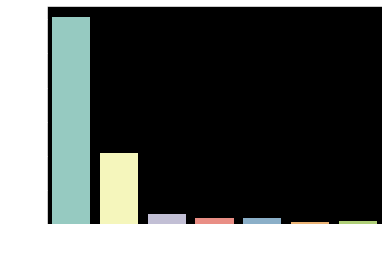

In [9]:
# Plot SibSp
sns.countplot(dataset['SibSp'])


## Data Preprocessing
Data Wrangling (Data cleaning)
remove all Nan value

In [10]:
dataset.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

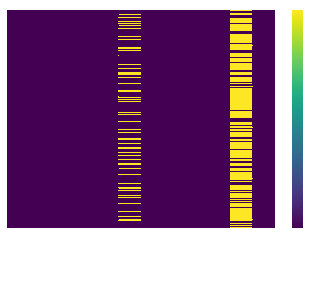

In [12]:
# Plot Heatmap and visulize null values

sns.heatmap(dataset.isnull(), yticklabels=False, cmap='viridis')

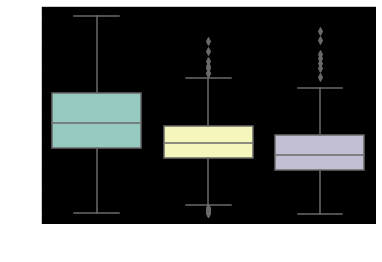

In [13]:
sns.boxplot(x='Pclass', y='Age', data=dataset)

Passenger travelling in 1st class and 2nd class teds to 
be older than 3rd class


You can drop the missing value or fill some other value
which is called 'cumputation'

Cabin colomn has more Nan value so we can drop it

In [14]:
dataset.drop('Cabin', axis=1, inplace=True)

In [15]:
dataset['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [16]:
# fill Embarked nan values
dataset['Embarked'].fillna('S', inplace=True)

In [17]:
import re

def extract_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)

    if title_search:
        return title_search.group(1)
    else:
        return ""


In [18]:
dataset['Title'] = dataset['Name'].apply(extract_title)
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,Mr


In [19]:
dataset['Title'].isnull().sum()

0

In [20]:
dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
dataset['Title'] = dataset['Title'].replace(['Dr', 'Lady', 'Countess', 'Capt', 'Col', 'Don', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

dataset['Title'].value_counts()

Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: Title, dtype: int64

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,Rare
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,Mr


In [21]:
# Filling Age values
dataset.dropna(inplace=True)

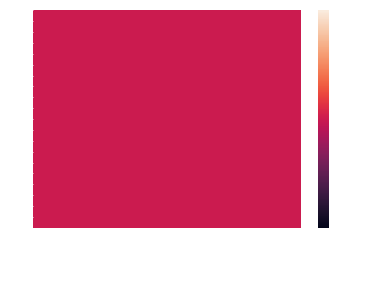

In [22]:
sns.heatmap(dataset.isnull())

### Encoding Categorical Features

In [23]:
pd.get_dummies(dataset['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
885,1,0
886,0,1
887,1,0
889,0,1


In [24]:
sex = pd.get_dummies(dataset['Sex'], drop_first=True)
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
885,0
886,1
887,0
889,1


In [25]:
pclass = pd.get_dummies(dataset['Pclass'], drop_first=True)
pclass

,2,3
0,0,1
1,0,0
2,0,1
3,0,0
4,0,1
...,...,...
885,0,1
886,1,0
887,0,0
889,0,0


In [26]:
embarked = pd.get_dummies(dataset['Embarked'], drop_first=True)
embarked

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
885,1,0
886,0,1
887,0,1
889,0,0


In [27]:
dataset.drop(['Sex', 'Pclass', 'PassengerId', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)
dataset = pd.concat([dataset, sex, pclass, embarked], axis=1)
dataset

,Survived,Age,SibSp,Parch,Fare,Title,male,2,3,Q,S
0,0,22.0,1,0,7.2500,Mr,1,0,1,0,1
1,1,38.0,1,0,71.2833,Mrs,0,0,0,0,0
2,1,26.0,0,0,7.9250,Miss,0,0,1,0,1
3,1,35.0,1,0,53.1000,Mrs,0,0,0,0,1
4,0,35.0,0,0,8.0500,Mr,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
885,0,39.0,0,5,29.1250,Mrs,0,0,1,1,0
886,0,27.0,0,0,13.0000,Rev,1,1,0,0,1
887,1,19.0,0,0,30.0000,Miss,0,0,0,0,1
889,1,26.0,0,0,30.0000,Mr,1,0,0,0,0


In [28]:
dataset.to_csv('cleaned_titanic_data.csv', index=False)